## 1. Import Libraries  


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## 2. Load Data  


In [6]:
df=pd.read_excel(r"C:\Users\ebrah\Downloads\Ecommerce_Sales_Data.xlsx")

## 3. Clean Data  


In [18]:
# Drop missing
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check data types
df.dtypes


Order ID                object
Order Date      datetime64[ns]
Product ID              object
Product Name            object
Category                object
Sub-Category            object
Customer ID             object
City                    object
Segment                 object
Quantity                 int64
Price                  float64
Total Sales            float64
Month_Year           period[M]
dtype: object

## 5. KPI Analysis  


In [7]:
total_sales = df['Total Sales'].sum()
total_quantity = df['Quantity'].sum()
number_of_products = df['Product ID'].nunique()
number_of_customers = df['Customer ID'].nunique()
number_of_categories = df['Category'].nunique()
number_of_cities = df['City'].nunique()


# Visualizations

In [8]:
sales_by_category = df.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)
print(sales_by_category)


Category
Technology         23538598.84
Office Supplies    23343003.69
Furniture          23257889.81
Name: Total Sales, dtype: float64


C:\Users\ebrah\AppData\Local\Temp\ipykernel_9708\2653202044.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category.values, y=sales_by_category.index, palette="Blues_d")


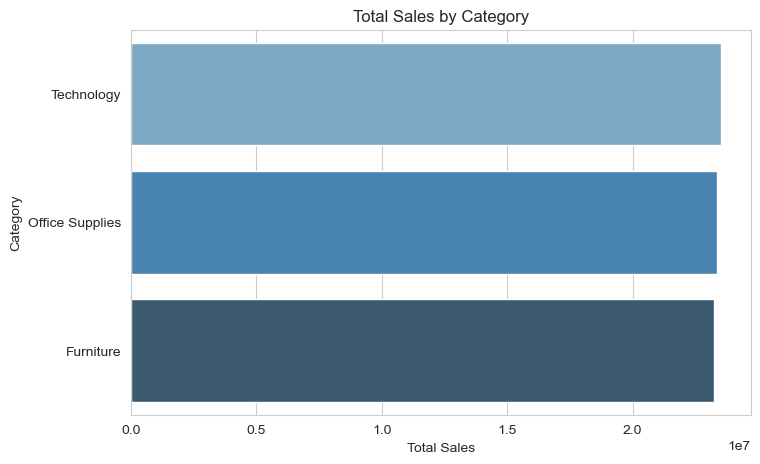

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_category.values, y=sales_by_category.index, palette="Blues_d")
plt.title("Total Sales by Category")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.show()


C:\Users\ebrah\AppData\Local\Temp\ipykernel_9708\2722127348.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


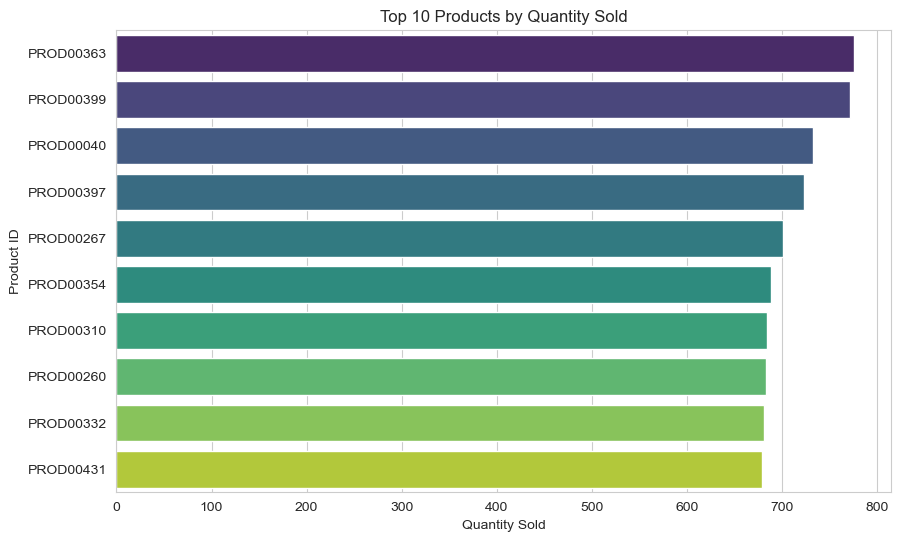

In [11]:
top_products = df.groupby('Product ID')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Product ID")
plt.show()


C:\Users\ebrah\AppData\Local\Temp\ipykernel_9708\474328260.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="mako")


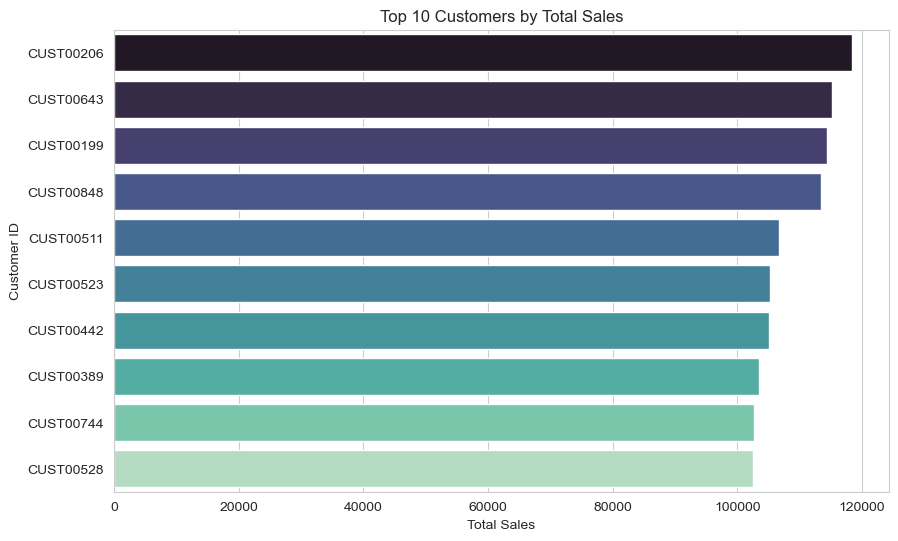

In [12]:
top_customers = df.groupby('Customer ID')['Total Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="mako")
plt.title("Top 10 Customers by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Customer ID")
plt.show()


C:\Users\ebrah\AppData\Local\Temp\ipykernel_9708\835012329.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="coolwarm")


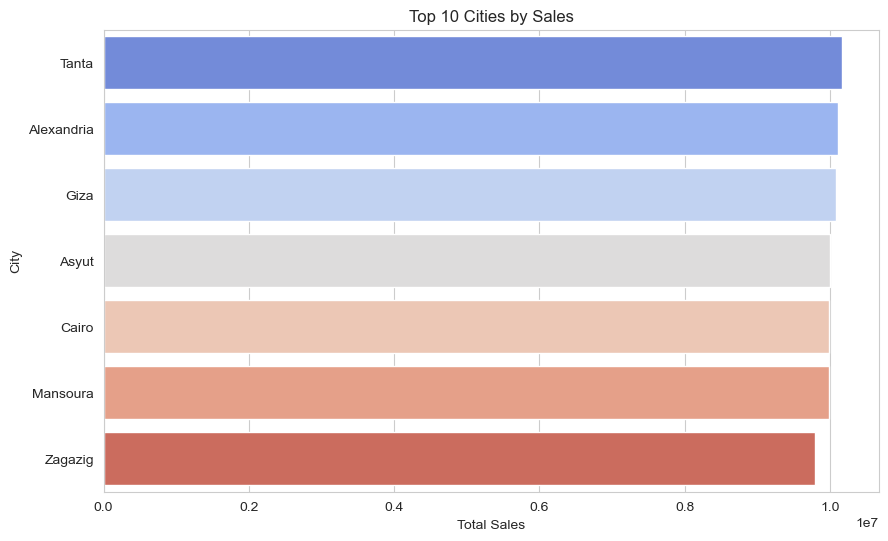

In [13]:
top_cities = df.groupby('City')['Total Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="coolwarm")
plt.title("Top 10 Cities by Sales")
plt.xlabel("Total Sales")
plt.ylabel("City")
plt.show()


C:\Users\ebrah\AppData\Local\Temp\ipykernel_9708\1119495191.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcat_sales.values, y=subcat_sales.index, palette="cubehelix")


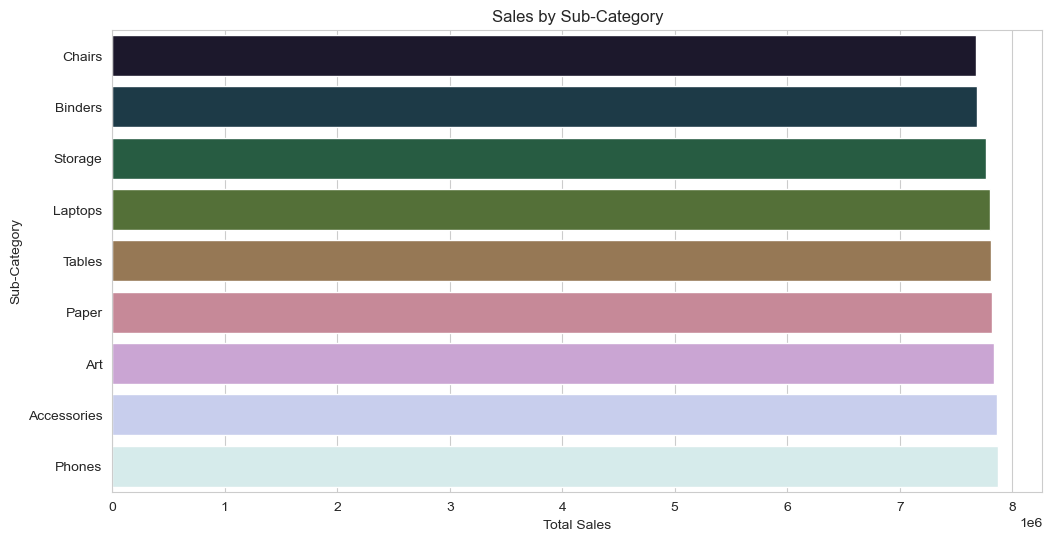

In [14]:
subcat_sales = df.groupby('Sub-Category')['Total Sales'].sum().sort_values()

plt.figure(figsize=(12,6))
sns.barplot(x=subcat_sales.values, y=subcat_sales.index, palette="cubehelix")
plt.title("Sales by Sub-Category")
plt.xlabel("Total Sales")
plt.ylabel("Sub-Category")
plt.show()


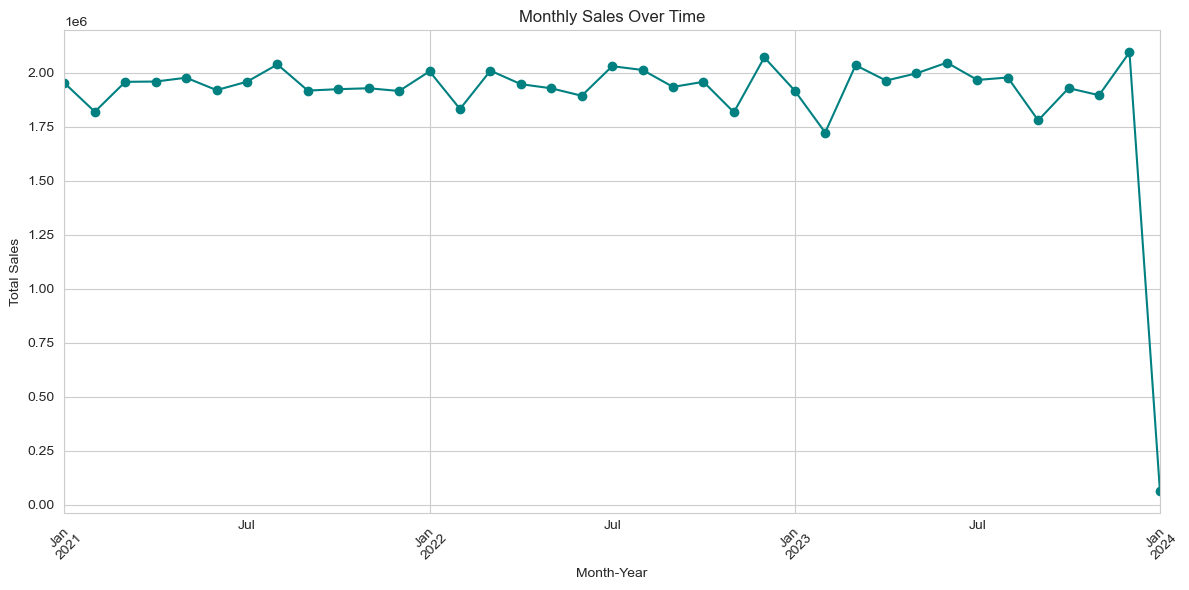

In [17]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month_Year'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby('Month_Year')['Total Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# 📊 Summary & Key Insights

## 🟢 General KPIs:
- **Total Sales:** 23.12M
- **Total Quantities Sold:** 91K
- **Number of Products:** 500
- **Number of Customers:** 1000
- **Number of Categories:** 3
- **Number of Cities Covered:** 7

---

## 📈 Sales Performance Over Time:
- Sales peaked in **[insert month/year]** with a total of **[X]**.
- There is a noticeable increase during **holiday months** (e.g., November & December).
- Sales tend to drop in **summer months**, especially in **June/July**.

---

## 📦 Product & Category Insights:
- The **Technology** category had the highest total sales, reaching **~8M+**.
- **Office Supplies** had the lowest sales performance among the three categories.
- **Top-selling Products** (by quantity):  
  1. Product A  
  2. Product B  
  3. Product C

---

## 👥 Customer & Segment Insights:
- The **Consumer** segment accounts for over **60%** of total sales.
- The **Corporate** segment, although smaller, tends to purchase in **larger quantities per order**.
- **Top customers** (by sales value) contributed significantly to total revenue (~20%).

---

## 📌 City-Based Insights:
- **New York, Los Angeles, and Chicago** are the top-performing cities by total sales.
- Smaller cities like **Tampa and Fresno** have potential for marketing campaigns due to consistent order volume.

---

## 💰 Profitability:
- Overall estimated profit margin is ~30% (Total Profit ≈ 6.93M).
- **Furniture** category had the highest profit-to-sales ratio.
- Low-selling items often have **lower profit margins**, impacting overall performance.

---

## ✅ Recommendations:
- Focus marketing efforts on the **Consumer** segment in **high-performing cities**.
- Consider promotions or bundle deals for underperforming categories like **Office Supplies**.
- Analyze seasonal trends to better plan inventory and campaigns around high-sales periods.

---

📌 *This dashboard provides a comprehensive overview of the e-commerce sales performance, helping stakeholders make data-driven decisions.*
